<h1>第08章 MVC模式<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#必要的准备工作" data-toc-modified-id="必要的准备工作-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>必要的准备工作</a></span></li><li><span><a href="#非MVC模式（Model1）" data-toc-modified-id="非MVC模式（Model1）-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>非MVC模式（Model1）</a></span><ul class="toc-item"><li><span><a href="#Model1的特点" data-toc-modified-id="Model1的特点-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Model1的特点</a></span></li><li><span><a href="#Model1的应用范围" data-toc-modified-id="Model1的应用范围-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Model1的应用范围</a></span></li></ul></li><li><span><a href="#MVC编程模式（Model2）" data-toc-modified-id="MVC编程模式（Model2）-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>MVC编程模式（Model2）</a></span><ul class="toc-item"><li><span><a href="#什么是MVC模式" data-toc-modified-id="什么是MVC模式-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>什么是MVC模式</a></span></li><li><span><a href="#MVC模式在Web编程中的应用" data-toc-modified-id="MVC模式在Web编程中的应用-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>MVC模式在Web编程中的应用</a></span></li><li><span><a href="#JSP中的MVC模式" data-toc-modified-id="JSP中的MVC模式-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>JSP中的MVC模式</a></span></li></ul></li><li><span><a href="#模型的生命周期与视图更新" data-toc-modified-id="模型的生命周期与视图更新-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>模型的生命周期与视图更新</a></span><ul class="toc-item"><li><span><a href="#request周期的Javabean" data-toc-modified-id="request周期的Javabean-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>request周期的Javabean</a></span></li><li><span><a href="#session周期的Javabean" data-toc-modified-id="session周期的Javabean-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>session周期的Javabean</a></span></li><li><span><a href="#application周期的Javabean" data-toc-modified-id="application周期的Javabean-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>application周期的Javabean</a></span></li></ul></li><li><span><a href="#MVC模式的简单实例" data-toc-modified-id="MVC模式的简单实例-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>MVC模式的简单实例</a></span><ul class="toc-item"><li><span><a href="#Javabean和Servlet的管理" data-toc-modified-id="Javabean和Servlet的管理-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Javabean和Servlet的管理</a></span></li><li><span><a href="#计算等差、等比数列的和" data-toc-modified-id="计算等差、等比数列的和-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>计算等差、等比数列的和</a></span></li><li><span><a href="#简单的计算器" data-toc-modified-id="简单的计算器-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>简单的计算器</a></span></li></ul></li><li><span><a href="#小结" data-toc-modified-id="小结-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>小结</a></span></li><li><span><a href="#实验" data-toc-modified-id="实验-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>实验</a></span><ul class="toc-item"><li><span><a href="#实验7_1-计算一元二次方程的根" data-toc-modified-id="实验7_1-计算一元二次方程的根-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>实验7_1 计算一元二次方程的根</a></span></li><li><span><a href="#实验7_2-计算梯形的面积" data-toc-modified-id="实验7_2-计算梯形的面积-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>实验7_2 计算梯形的面积</a></span></li></ul></li><li><span><a href="#思考题" data-toc-modified-id="思考题-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>思考题</a></span></li></ul></div>

# 必要的准备工作

本章将使用javax.servlet.http包中的类，  javax.servlet.http包不在JDK的核心类库中，因此需要将Tomcat安装目录lib子目录 `E:\apache-tomcat-9.0.13\lib` 中的 `servlet-api.jar` 文件复制到Tomcat服务器所使用的JDK的扩展目录中，比如，复制到 `C:\Program Files\Java\jdk1.8.0_202\jre\lib\ext` 中。

本章使用的Web服务目录是Root，Root是在Tomcat安装目录的webapps目录下建立的Web服务目录。

另外，需要在当前web服务目录下建立如下的目录结构：Root\WEB-INF\classes

本章的Servlet类的包名为myservlet.control，那么在classes下建立子目录：\myservlet\control；Javabean类的包名为mybean.data，那么在classes下建立子目录：\mybean\data，如图所示

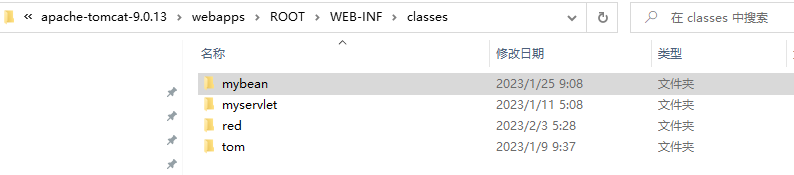

# 非MVC模式（Model1）

在基于JSP的B/S程序开发中，可以采用不同的程序模式。非MVC模式（Model1）是一种最初级的模式，它以JSP文件为中心。在这种模式中，JSP页面不仅负责表现逻辑，也负责控制逻辑。非MVC模式有两种结构。项目中只有JSP页面组成的Web应用程序和JSP + JavaBean技术组成的Web应用程序。

## Model1的特点

最简单的方法就是直接使用JSP文件开发所有功能。这种模式对于初学者来说，逻辑比较简单，容易理解，但是不容易实现复杂的页面功能，而且当功能复杂时，代码的可读性差。这种结构的优点是简单，可以快速地搭建原型，适合涉及几个JSP页面的非常小型的应用。但它也有非常多的缺点：

- HTML和Java强耦合在一起。
 
 JSP页面中HTML与大量的Java代码交织在一起，不但给页面设计带来极大困难，而且给阅读代码、理解程序带来干扰。

- 极难维护与扩展。

在JSP页面中直接嵌入访问数据的代码及SQL语句，会使数据库的任何改动都必须打开所有的JSP页面进行维修，当有几十个甚至几百个JSP页面时，改动的工作量非常大。

- 不方便调试。

业务逻辑与HTML代码，甚至JavaScript代码强耦合在一起，极难定位错误。

现在网上很多开源的JSP代码都是这种结构，不过在实际项目中应该少用或根本不使用这种结构，因为此结构完全没有体现出JSP技术的强大优势。

JSP + JavaBean技术组成的应用程序模式中，JSP页面不仅负责表示逻辑，也负责控制逻辑，而业务逻辑则由JavaBeans来实现，如图所示。

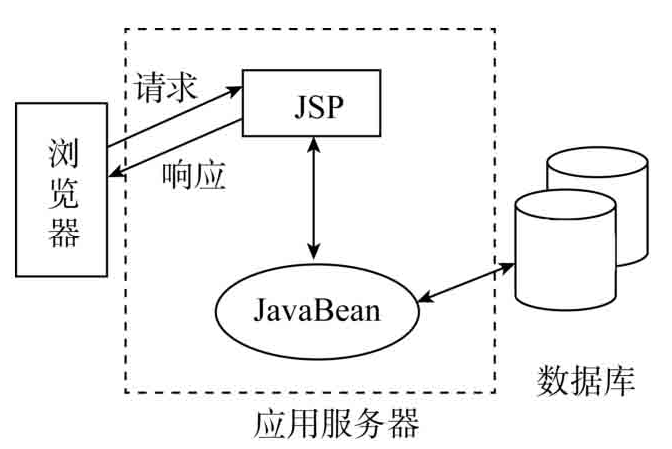

在专业书籍中这种方式被称为逻辑耦合在页面中。这种处理方式对一些规模很小的项目，如一个简单的留言簿，没什么太大的坏处。实际上，人们开始接触一些新的东西（例如用JSP访问数据库），往往喜欢别人能提供一个包含这一切的单个JSP页面，因为这样就可以在一个页面上把握全局，便于理解。这种结构的优点如下：
- 纯净的JSP页面。

因为业务逻辑和数据库操作已经从JSP页面中剥离出来，JSP页面中只需嵌入少量的Java代码甚至不使用Java代码。

- 可重用的组件。

设计良好的JavaBean可以重用，甚至可以作为产品销售，在团队协作的项目中，可重用的JavaBean将会大大减少开发人员的工作量，加快开发进度。

- 方便进行调试。

因为复杂的操作都封装在一个或者多个JavaBean中，错误比较容易定位。

- 易维护易扩展。

系统的升级或者更改往往集中在一组JavaBean中，而不用编辑所有的JSP页面。

## Model1的应用范围

Model1模式的表现逻辑和控制逻辑全部逻辑耦合在页面中，这种处理方式比较适用于一些规模很小只有几个简单页面的项目。用Model1模式开发大型项目时，程序流向由一些互相能够感知的页面决定，当页面很多时，要清楚地把握其流向将是很复杂的事情，当用户修改一页时，可能会影响相关的很多页面，大有牵一发而动全局的感觉，使得程序的修改与维护变得异常困难；还有一个问题就是程序逻辑开发与页面设计纠缠在一起，既不便于分工合作也不利于代码的重用，这样的程序其健壮性和可伸缩性都不好。

# MVC编程模式（Model2）

为了克服Model1的缺陷，人们引入了三层模型，术语称作MVC模式（Model2）。Model2架构是基于模型视图控制器（Model-View-Controller，MVC）的设计模式，这种模式比较适合构建复杂的应用程序。

## 什么是MVC模式

Model2的结构如图所示，用户通过提交请求与Controller组件（通常表现为Servlets）交互。接着Controller组件实例化Model组件（通常表现为JavaBeans或者类似技术），并且根据应用的逻辑操纵它们。Model被创建后，Controller就要确定为用户显示的View（常常表现为JSP），同时View与Model交互操作，获得并显示相关数据。在下一个请求被提交到Controller重复上述操作之前，View可以修改Model的状态。

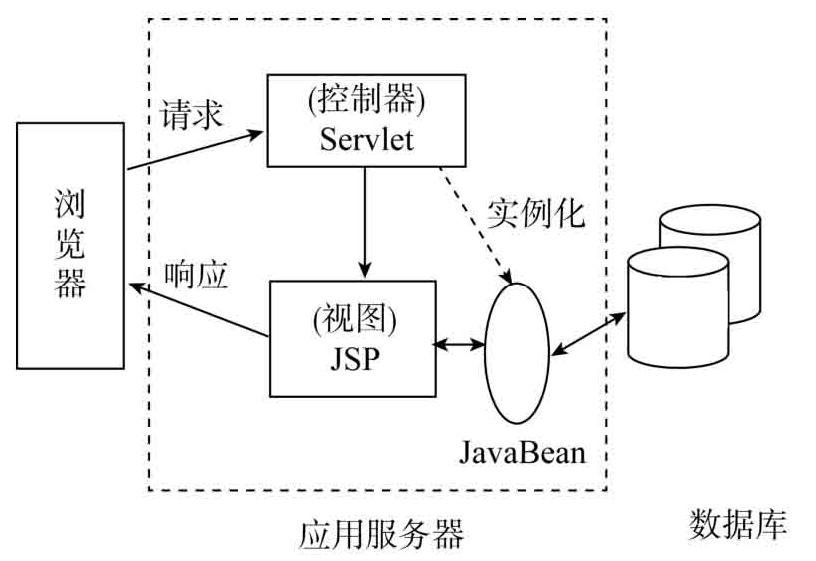

MVC是一种通过三个不同部分构造一个软件或组件的理想办法：

1. 模型（Model） 

          用于存储数据的对象。
    
2. 视图（View） 

         向控制器提交所须数据、显示模型中的数据。
    
3. 控制器（Controller） 

          负责具体的业务逻辑操作，即控制器根据视图提出的要求对数据做出（商业）处理，并将有关结果存储到模型中，并负责让模型和视图进行必要的交互，当模型中的数据变化时，让视图更新显示。


Model2模式引入了“控制器”这个概念，控制器一般由Servlet来担任，客户端的请求不再直接送给一个处理业务逻辑的JSP页面，而是送给这个控制器，再由控制器根据具体的请求调用不同的事务逻辑，并将处理结果返回到合适的页面。因此，这个Servlet控制器为应用程序提供了一个进行前后端处理的中枢。一方面为输入数据的验证、身份认证、日志及实现国际化编程提供了一个合适的切入点，另一方面也提供了将业务逻辑从JSP文件分离的可能。业务逻辑从JSP页面分离后，JSP文件蜕变成一个单纯完成显示任务的东西，这就是常说的View。而独立出来的事务逻辑变成人们常说的Model，再加上控制器本身，就构成了MVC模式。实践证明，MVC模式为大型程序的开发及维护提供了巨大的便利。

MVC设计模式很清楚地划定了程序员与设计者的角色界限。换句话说，从商业逻辑上拆解了数据。这种模式让设计者集中于设计应用程序的显示部分，而让开发者集中于开发驱动应用程序功能所需的组件。

## MVC模式在Web编程中的应用

MVC模式有多种变异，不过它们都是基于相同的基础结构：应用程序的数据模型（Model）、代码显示（View），以及程序控制逻辑（Controller）是存在其中的独立但相互能通信的组件。模型组件描述并处理应用程序数据，视图指的是用户接口，它反映的是模型数据并把它递交给用户。控制器是将视图上的行为（例如按下Submit按钮）映射到模型上的操作（例如，检索用户详细信息）。模型更新后，视图也被更新，用户就能够完成更多行为。MVC模式使代码易懂而且使代码更容易重用。另外，在很多工程中视图经常要被更新，MVC模式将模型和控制器与这些所做的更改独立开来。

MVC模式是一种非常理想化的设计模式，应用MVC模式完成两个以上项目的人都有同样的体会，它们已经对以前的工作方法进行了彻底的改造。工作模式的改变要付出很大的代价，但现在有现成的技术架构可以采用，省去了在项目中自己开发、摸索。开源Apache Struts framework提供了实现MVC设计模式最好的工具。

## JSP中的MVC模式

1.  模型（Model） 

一个或多个Javabean对象，用于存储数据。Javabean主要提供简单的setXxx方法和getXxx方法，在这些方法中不涉及对数据的具体处理细节，以便增强模型的通用性。

2. 视图（View） 

一个或多个JSP页面，其作用是向控制器提交必要的数据和显示数据。JSP页面可以使用HTML标记、Javabean标记以及Java程序片或Java表达式来显示数据。

3. 控制器（Controller） 

一个或多个servlet对象，根据视图提交的要求进行数据处理操作，并将有关的结果存储到Javabean中，然后servlet使用转发或重定向的方式请求视图中的某个JSP页面显示数据，比如让某个JSP页面通过使用Javabean标记、Java程序片或Java表达式显示控制器存储在Javabean中的数据。

MVC模式的结构如图所示。

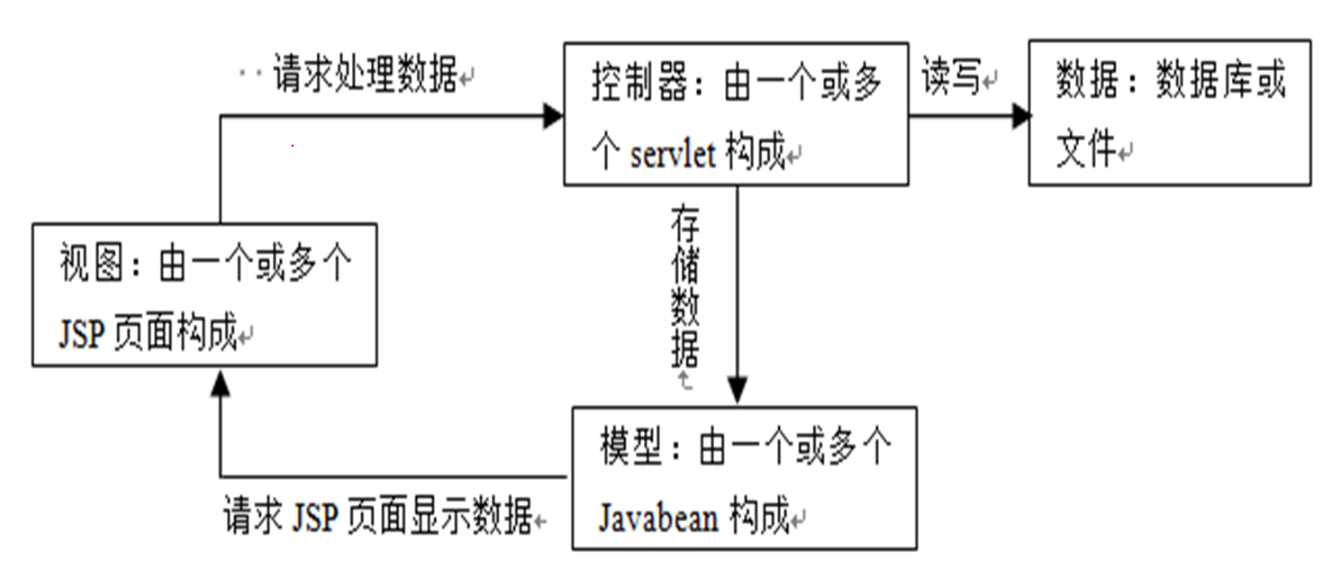

# 模型的生命周期与视图更新

在JSP+Javabean模式中，由JSP页面通过使用useBean标记：
```
      <jsp:useBean id="名字" class="创建bean的类" scope="生命周期"/>
```
创建Javabean。

在JSP中的MVC模式中，也可以由控制器servet创建Javabean。在JSP中的MVC模式中，servet创建的Javabean也涉及到生命周期(有效期限)，生命周期分为request、session和application。

以下假设创建Javabean的类的名字是BeanClass，该类的包名为user.yourbean。以下分三种情形给予讨论。


## request周期的Javabean

1. Javabean的创建

（1）用BeanClass类的某个构造方法创建bean对象，例如：
  ```
     BeanClass bean=new BeanClass();
 ```   
（2）将所创建的bean对象存放到request中，并指定查找该bean的关键字： request.setAttribute("keyWord",bean);

2. 视图更新
  servlet使用转发方式让JSP页面，显示bean中的数据。

3. jsp页面可以使用
```
   <jsp:useBean id="keyWord" type="user.yourbean.BeanClass" scope="request"/>
或
<jsp:useBean id="keyWord" class="user.yourbean.BeanClass" scope="request"/>    
```
来使用bean.


## session周期的Javabean

1. Javabean的创建

（1）用BeanClass类的某个构造方法创建bean对象，例如：

```
     BeanClass bean=new BeanClass();
 ```   
（2）将所创建的bean对象存放到session中，并指定查找该bean的关键字：    

```
session.setAttribute("keyWord",bean);
```

2. 视图更新

servlet使用转发或重定向方法让JSP页面来显示bean中的数据

3. jsp页面可以使用

```
   <jsp:useBean id="keyWord" type="user.yourbean.BeanClass" scope=“session"/>
```

或

```
<jsp:useBean id="keyWord" class="user.yourbean.BeanClass" scope=“session"/>  
```

来使用bean.    

## application周期的Javabean

1. Javabean的创建

（1）用BeanClass类的某个构造方法创建bean对象，例如：

```
     BeanClass bean=new BeanClass();
```

（2）将所创建的bean对象存放到appication中，并指定查找该bean的关键字：

```
     getServletContext().setAttribute("keyWord",bean);
```

2. 视图更新

   servlet使用转发或重定向方法让JSP页面来显示bean中的数据


3. jsp页面可以使用

```
   <jsp:useBean id="keyWord" type="user.yourbean.BeanClass" scope=“appication"/>
```
或
```
<jsp:useBean id="keyWord" class="user.yourbean.BeanClass" scope=“application"/>   
    
```

来使用bean.


# MVC模式的简单实例

本节结合几个简单的实例体现MVC三个部分的设计与实现。

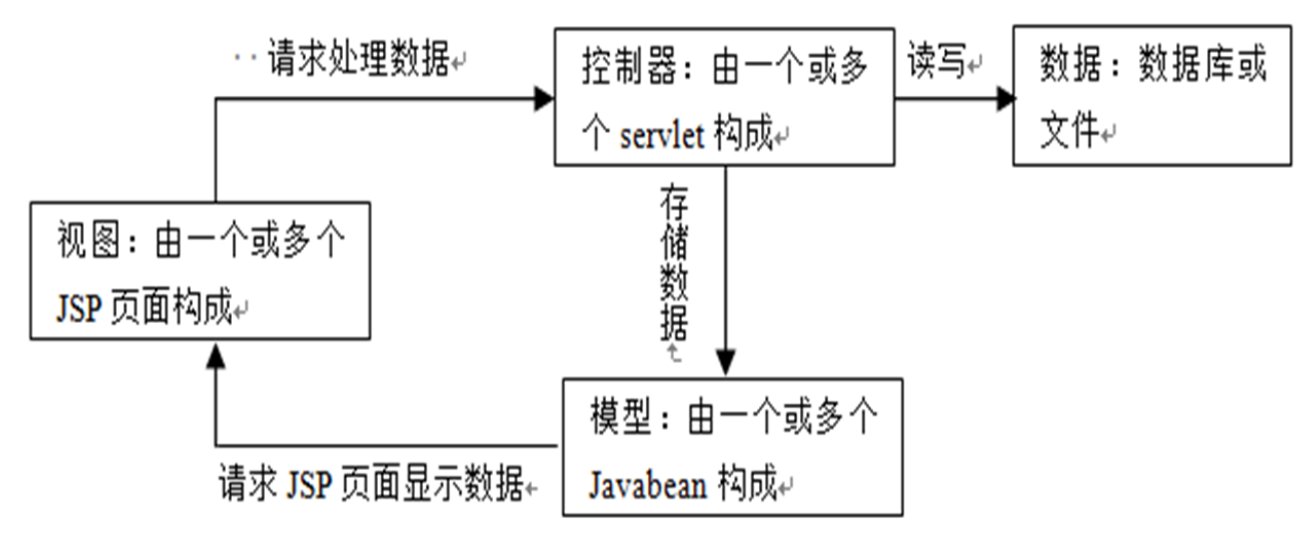

## Javabean和Servlet的管理

按着本章的约定


1．将Javabean类和Servlet类源文件分别保存到Web服务目录的下述目录中：

```
WEB-INF\classes\mybean\data
WEB-INF\classes\myservlet\control
```

2．然后进入包名的父目录classes,

按如下格式分别编译Javabean和sevlet的源文件：
```
classes> javac mybean\data\Javabean的源文件
classes> javac myservlet\control\servlet的源文件
```

## 计算等差、等比数列的和

例子1设计一个web应用，该web应用提供两个JSP页面，一个页面使得用户可以输入等差数列的首项、公差、和求和项数以及等比数列首项、公比和求和项数；

另一个页面可以显示等差数列和等比数列的求和结果。

web应用提供一个名字为computerSum的servlet:computerSum负责计算等差数列和等比数列的和，然后将有关数据存储到Javabean中.

web应用提供的Javabean负责刻画等差数列和等比数列，提供简单的获取数据和修改数据的方法。

例子1中涉及到的JSP页面均保存到目录ch06中。

- web.xml

根据本例子1中使用的servlet的名字及相关类，Web服务目录 WEB-INF 下的 web.xml 文件需包含如下内容。

- 模型（Javabean）

In [18]:
%%file E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\mybean\data\Example6_1_Bean.java

package mybean.data;
public class Example6_1_Bean{
   double firstItem;  //数列首项
   double var;        //公差或公比
   int number;        //求和项数
   double sum;       //求和结果
   String name="";   //数列类别       
   public void setFirstItem(double a){
      firstItem=a;
   }
   public double getFirstItem(){
      return firstItem;
   }
   public void setVar(double b){
      var=b;
   }
   public double getVar(){
      return var;
   }
   public void setNumber(int n){
      number=n;
   }
   public double getNumber(){
      return number;
   }
   public void setSum(double s){
      sum=s;
   }
   public double getSum(){
      return sum;
   }
   public void setName(String na){
      name=na;
   }
   public String getName(){
     return name;
   }
}

Overwriting E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\mybean\data\Example6_1_Bean.java


In [19]:
!javac -encoding UTF-8 E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\mybean\data\Example6_1_Bean.java

Javabean模型Example6_1_Bean.java中的getXxx和setXxx方法不涉及对数据的具体处理细节，以便增强模型的通用性。比如，setSum(double s)仅仅将参数s的值赋给属性sum，因此，模型即可以存储等差数列的和也可以存储等比数列的和。

如果setSum(double s)参与具体的计算，比如，计算等差数列的和，然后将和赋给属性sum，那么该模型就不能存储等比数列的和，减弱了模型的通用性。在本例子中Example6_1_Bean创建的Javabean模型的id是seriesData，scope取值是request。


- 控制器（servlet）


In [32]:
%%file E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\myservlet\control\Example6_1_Servlet.java
package myservlet.control;
import mybean.data.Example6_1_Bean;
import java.io.*;
import javax.servlet.*;
import javax.servlet.http.*;
public class Example6_1_Servlet extends HttpServlet{
   public void init(ServletConfig config) throws ServletException{
      super.init(config);
   }
   public void doPost(HttpServletRequest request,HttpServletResponse response)
                        throws ServletException,IOException{
      Example6_1_Bean seriesData=new Example6_1_Bean();  //创建Javabean对象
      request.setAttribute("seriesData",seriesData);//将seriesData存到request对象中
      double a=Double.parseDouble(request.getParameter("firstItem"));
      double d=Double.parseDouble(request.getParameter("var"));
      int n=Integer.parseInt(request.getParameter("number"));
      seriesData.setFirstItem(a);      //将数据存储在数据模型seriesData中 
      seriesData.setVar(d);           
      seriesData.setNumber(n);
      double sum=0,item=a;
      int i=1;
      seriesData.setName("等差数列的公差");
      while(i<=n){                     //计算等差数列的和
         sum=sum+item;
         i++;
         item=item+d;  
      }
      seriesData.setSum(sum);
      //请求example6_1_show.jsp显示seriesData中的数据:
      RequestDispatcher dispatcher=
      request.getRequestDispatcher("ch06/example6_1_show.jsp");
      dispatcher.forward(request,response);  
   } 
   public  void  doGet(HttpServletRequest request,HttpServletResponse response) 
                        throws ServletException,IOException{
      Example6_1_Bean seriesData=new Example6_1_Bean(); 
      request.setAttribute("seriesData",seriesData);
      double a=Double.parseDouble(request.getParameter("firstItem"));
      double d=Double.parseDouble(request.getParameter("var"));
      int n=Integer.parseInt(request.getParameter("number"));
      seriesData.setFirstItem(a);            
      seriesData.setVar(d);           
      seriesData.setNumber(n);
      double sum=0,item=a;
      int i=1;
      seriesData.setName("等比数列的公比");
      while(i<=n){                     //计算等比数列的和
          sum=sum+item;
          i++;
          item=item*d;  
      }
      seriesData.setSum(sum);
      RequestDispatcher dispatcher=
      request.getRequestDispatcher("ch06/example6_1_show.jsp");
      dispatcher.forward(request,response);  
    }
}


Overwriting E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\myservlet\control\Example6_1_Servlet.java


In [33]:
!javac -encoding UTF-8 E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\mybean\data\Example6_1_Bean.java E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\myservlet\control\Example6_1_Servlet.java

Example6_1_Sevlet负责创建名字是computeSum的servlet（见例子1前面web.xml文件的有关内容）。

名字为computeSum的servlet控制器使用doPost方法计算等差数列的和；使用doGet方法计算等比数列的和，并将结果存放到id是seriesData的Javabean数据模型中，然后用转发的方法请求example6_1_show.jsp显示seriesData中的数据。


- 视图（JSP页面）

视图部分由2个JSP页面构成，其中example6_1.jsp页面负责提供输入数据的视图，即用户可以在该页面输入数列的首项，公差（公比）和求和项数，然后将数据提交给名字是computeSum的servlet。

computeSum负责计算数列的和，并将结果存储到id为seriesData的Javabean数据模型中，然后请求视图中的example6_1_show.jsp显示数据模型seriesData中的数据。

In [30]:
%%file E:\apache-tomcat-9.0.13\webapps\ROOT\ch06\example6_1.jsp  
<%@ page contentType="text/html;charset=utf-8" %>
<HTML><body bgcolor=#FFBBFF>
<font size=2>
<form action="/computeSum" method="post" >
   等差数列求和：
  <BR>输入首项:<input type=text name="firstItem" size=4>
      输入公差:<input type=text name="var" size=4>
      求和项数:<input type=text name="number" size=4>
  <input type=submit value="提交">
</form>
<form action="/computeSum" Method="get" >
   等比数列求和：
  <BR>输入首项:<input type=text name="firstItem" size=4>
      输入公比:<input type=text name="var" size=4>
      求和项数:<input type=text name="number" size=4>
  <input type=submit value="提交">
</form>
</font></body></HTML>

Overwriting E:\apache-tomcat-9.0.13\webapps\ROOT\ch06\example6_1.jsp


In [31]:
%%file E:\apache-tomcat-9.0.13\webapps\ROOT\ch06\example6_1_show.jsp  
<%@ page contentType="text/html;charset=utf-8" %>
<jsp:useBean id="seriesData" 
             type="mybean.data.Example6_1_Bean" scope="request"/>
<HTML><body bgcolor=#EEFF88>
  <table border=1>
   <tr> 
    <th> 数列的首项</th>
    <th> <jsp:getProperty name="seriesData" property="name"/></th>
    <th> 所求项数</th>
    <th> 求和结果</th>
   </tr>
    <td><jsp:getProperty name="seriesData" property="firstItem"/></td>
    <td><jsp:getProperty name="seriesData" property="var"/></td>
    <td><jsp:getProperty name="seriesData" property="number"/></td>
    <td><jsp:getProperty name="seriesData" property="sum"/></td>
   </tr>
   </table>
</body></HTML>

Overwriting E:\apache-tomcat-9.0.13\webapps\ROOT\ch06\example6_1_show.jsp


[点击example6_1.jsp](http://127.0.0.1:8080/ch06/example6_1.jsp)，查看效果：

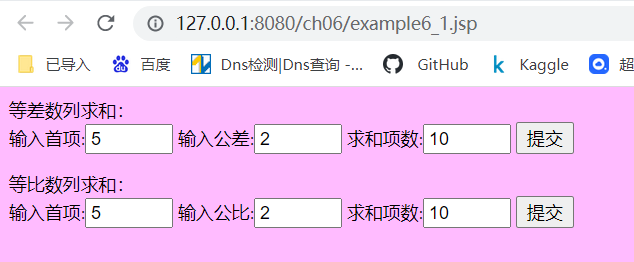

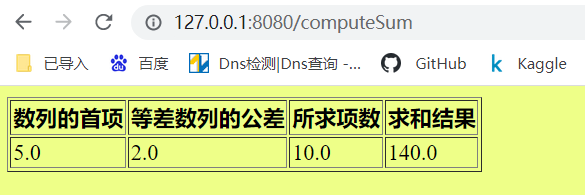

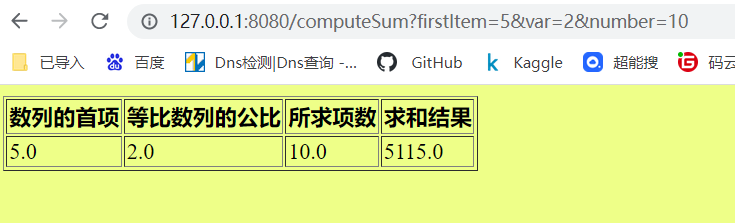

## 简单的计算器

例子2设计一个Web应用，只有一个JSP页面example6_2.jsp、一个Javabean和一个servlet。

JSP页面example6_2.jsp提供一个表单，用户可以通过表单输入两个数和算符号提交给servlet控制器。

Javabean负责存储运算数、运算符号和运算结果.

servlet控制器负责运算，将结果存储在Javabean中，并负责请求JSP页面example6_2.jsp显示Javanean中的数据。


例子6_2

例子2中涉及到的JSP页面均保存到Web服务目录ch06中。

- web.xml

根据本例子2中使用的servlet的名字及相关类，Web服务目录ch6的WEB-INF下的web.xml文件需包含如下内容（有关web.xml文件的编辑与保存见5.1.2）.


- 模型（Javabean）

Example6_2_Bean.java模型中的getXXX和setXXX方法可以显示和修改模型中的数据，但不参与数据的处理。在本例子中Example6_2_Bean创建的Javabean模型的id是digitBean，scope取值是session。


In [34]:
%%file E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\mybean\data\Example6_2_Bean.java
package mybean.data;
public class Example6_2_Bean{ 
   double numberOne,numberTwo,result;
   String operator="+";
   public void setNumberOne(double n){
      numberOne=n;
   }
   public double getNumberOne(){
      return numberOne; 
   }
   public void setNumberTwo(double n){
      numberTwo=n;
   }
   public double getNumberTwo(){
      return numberTwo; 
   }
   public void setOperator(String s){
      operator=s.trim();;
   }
   public String getOperator(){
      return operator;
   }
   public void setResult(double r){
      result=r; 
   }
   public double getResult(){
      return result; 
   }
}


Writing E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\mybean\data\Example6_2_Bean.java


In [35]:
!javac -encoding UTF-8 E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\mybean\data\Example6_2_Bean.java

- 控制器（servlet）


In [39]:
%%file E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\myservlet\control\Example6_2_Servlet.java
package myservlet.control;
import mybean.data.Example6_2_Bean;
import java.io.*;
import javax.servlet.*;
import javax.servlet.http.*;
public class Example6_2_Servlet extends HttpServlet{
   public void init(ServletConfig config) throws ServletException{
      super.init(config);
   }
   public void doPost(HttpServletRequest request,HttpServletResponse response)
               throws ServletException,IOException{
      Example6_2_Bean digitBean=null;
      HttpSession session=request.getSession(true);
      try{  digitBean=(Example6_2_Bean)session.getAttribute("digitBean");
            if(digitBean==null){
                digitBean=new Example6_2_Bean(); //创建Javabean对象
                 //将digitBean存储到session对象中: 
                session.setAttribute("digitBean",digitBean);
            }
      }
      catch(Exception exp){
            digitBean=new Example6_2_Bean();  //创建Javabean对象
            session.setAttribute("digitBean",digitBean);//digitBean存储到session中
      } 
      String str1=request.getParameter("numberOne");
      String str2=request.getParameter("numberTwo");
      if(str1==null||str2==null)
         return;
      if(str1.length()==0||str2.length()==0)
         return;
      double numberOne=Double.parseDouble(str1);
      double numberTwo=Double.parseDouble(str2);
      String operator=request.getParameter("operator");
      double result=0;
      if(operator.equals("+"))
         result=numberOne+numberTwo;
      else if(operator.equals("-"))
         result=numberOne-numberTwo;
      else if(operator.equals("*"))
         result=numberOne*numberTwo;
      else if(operator.equals("/"))
         result=numberOne/numberTwo;
      digitBean.setNumberOne(numberOne);     //将数据存储在digitBean中 
      digitBean.setNumberTwo(numberTwo);  
      digitBean.setOperator(operator);   
      digitBean.setResult(result); 
      //请求example6_2.jsp显示digitBean中的数据
      response.sendRedirect("ch06/example6_2.jsp");  //重定向
   } 
   public  void  doGet(HttpServletRequest request,HttpServletResponse response) 
                        throws ServletException,IOException{
       doPost(request,response);
   }
}


Overwriting E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\myservlet\control\Example6_2_Servlet.java


In [41]:
!javac -encoding UTF-8 E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\mybean\data\Example6_2_Bean.java E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\myservlet\control\Example6_2_Servlet.java

Example6_2_Sevlet负责创建名字是compute的servlet,名字为compute的servlet控制器负责计算四则运算的结果，并将结果存放在id是digitBean的Javabean数据模型中，然后用重定向的方法，请求example6_2.jsp显示digitBean中的数据。


- 视图（JSP页面）


In [43]:
%%file E:\apache-tomcat-9.0.13\webapps\ROOT\ch06\example6_2.jsp  
<%@ page contentType="text/html;charset=utf-8" %>
<jsp:useBean id="digitBean" 
             class="mybean.data.Example6_2_Bean" scope="session"/>
<HTML><body bgcolor=#EFDDFA><font size=2>
  <form action="/compute" method=post name=form>
   <table>
   <tr><td> 输入两个数:</td>
       <td> <input type=text name="numberOne" value=0 size=6></td>
     <td> <input type=text name="numberTwo" value=0 size=6></td>
   </tr>
   <tr><td>选择运算符号:</td>
       <td> <select name="operator">
              <option value="+">+(加)
              <option value="-">-（减）
              <option value="*">*（乘）
              <option value="/">/（除）
            </select> 
       </td>
       <td> <input type="submit" value="提交" name="sub"></td>
   </tr>
   </table>
   </form> 
    运算结果：
  <jsp:getProperty name="digitBean" property="numberOne"/>
  <jsp:getProperty name="digitBean" property="operator"/>
  <jsp:getProperty name="digitBean" property="numberTwo"/> =
  <jsp:getProperty name="digitBean" property="result"/> 
</font></body></HTML>

Overwriting E:\apache-tomcat-9.0.13\webapps\ROOT\ch06\example6_2.jsp


视图部分由一个example6_2.jsp页面构成，该页面负责提供输入和显示数据的视图。用户可以在该页面输入参与运算的数据，然后将数据提交给名字是compute的servlet。compute负责计算四则运算的结果，并将结果存储到id为digitBean的Javabean数据模型中，然后请求视图example6_2.jsp显示数据模型digitBean中的数据。

[点击example6_2.jsp](http://127.0.0.1:8080/ch06/example6_2.jsp)，查看效果：

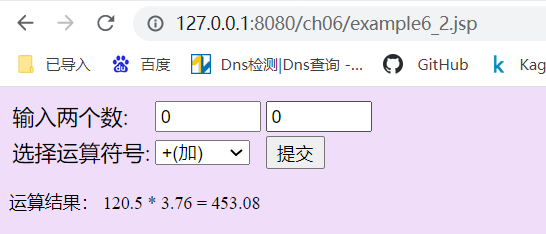

# 小结

- MVC模式的核心思想是有效的组合“视图”、“模型”和“控制器”。在JSP 技术中，视图是一个或多个JSP页面，其作用主要是向控制器提交必要的数据和为模型提供数据显示；模型是一个或多个JavaBean对象，用于存储数据；控制器是一个或多个servlet对象，根据视图提交的要求进行数据处理操作，并将有关的结果存储到Javabean中，然后servlet使用重定向方式请求视图中的某个JSP页面更新显示。
- 在MVC模式中，模型也可以由控制器负责创建和初始化

# 实验

## 实验7_1 计算一元二次方程的根

## 实验7_2 计算梯形的面积

一、实验目的
本实验的目的是掌握在MVC模式中怎样使用scope是request的bean及scope是session的bean。

二、实验内容
实验7-1：
视图：提供两个JSP页面,一个页面使得用户可以输入一元二次方程的系数;另一个页面可以显示一元二次方程的系数和根。
数据模型：提供的Javabean负责刻画一元二次方程，即可以存储一元二次方程的系数以及方程的根,提供简单的获取数据和修改数据的方法。
控制器：负责计算一元二次方程的根,然后将有关数据存储到Javabean数据模型中,然后用转发的方式请求视图中负责显示数据的JSP页面显示Javabean数据模型中的数据。

实验7-2：
视图：提供一个JSP页面,该页面使得用户可以输人梯形的上底、下底和高，并能显示梯形的上底、下底和高以及面积。
数据模型：提供的Javabean负责刻画梯形,即可以存储梯形的有关数据，提供简单的获取数据和修改数据的方法。
控制器：负责计算梯形的面积,然后将有关数据存储到Javabean数据模型中，然后用转发或重定向的方式请求视图中负责显示数据的JSP页面显示Javabean数据模型中的数据。

实验7-3：
采用JSP+JavaBean+Servlet实现留言板
在留言时，用户需要输入留言的标题、留言者的姓名、留言者的E-mail和留言内容。

三、参考代码
实验7-1：
Web.xml添加映射代码：

```
 <servlet>
	    <servlet-name>handle</servlet-name>
	    <servlet-class>myservlet.control.HandleData</servlet-class>
   </servlet>
   <servlet-mapping>
      <servlet-name>handle</servlet-name>
      <url-pattern>/handleData</url-pattern>
   </servlet-mapping>

```
Equation.java
```
 package mybean.data;

public class Equation
 {  double a,b,c;
    String rootOne,rootTwo;
    boolean squareEquation;
    public void setA(double a)
    { this.a=a;
    }
    public double getA()
    {  return a;
    }
    public void setB(double b)
    {  this.b=b;
    }
    public double getB()
    {  return b;
    }
    public void setC(double c)
    {  this.c=c;
    }
    public double getC()
    {  return c;
    }
    public void setRootOne(String root)
    { rootOne=root;
    }
    public String getRootOne()
    {  return rootOne;
    }
    public void setRootTwo(String root)
    { rootTwo=root;
    }
    public String getRootTwo()
    {  return rootTwo;
    }
    public void setIsSquareEquation(boolean b)
    { squareEquation=b;
    }
    public boolean getIsSquareEquation()
    {  return squareEquation;
    }
 }

```
Input.jsp
```
<%@ page language="java" contentType="text/html; charset=UTF-8" pageEncoding="UTF-8"%>
<!DOCTYPE html>
<HTML><BODY ><Font size=2>
 <FORM action="handleData" Method="post" >
   <BR>输入一元二次方程的系数：
    <BR> 二次项系数a:<Input type=text name="a" size=4>
         一次项系数b:<Input type=text name="b" size=4>
         常数项c:<Input type=text name="c" size=4>
    <Input type=submit value="提交">
  </FORM>
 </Font></BODY></HTML>

```
Show.jsp
```
<%@ page language="java" contentType="text/html; charset=UTF-8"
    pageEncoding="UTF-8"%>
<%@ page import="mybean.data.*"%> 
<!DOCTYPE html>

 <jsp:useBean id="equation" type="mybean.data.Equation" scope="request"/>
 <HTML><BODY ><Font size=2>
            一元二次方程的系数是：
<BR> 二次项系数：<jsp:getProperty name="equation"  property="a"/>
                一次项系数：<jsp:getProperty  name="equation" property="b"/>
                 常数项：<jsp:getProperty name="equation" property="c"/>
<BR>是一元二次方程吗？<jsp:getProperty name="equation" property="isSquareEquation"/>
<BR>方程的两个根是：<jsp:getProperty name="equation" property="rootOne"/>,
<jsp:getProperty name="equation" property="rootTwo"/>
</FONT></BODY></HTML>

```
HandleData.java
```
package myservlet.control;

import mybean.data.*;
import java.io.*;
import javax.servlet.*;
import javax.servlet.http.*;
public class HandleData extends HttpServlet
 {  public void init(ServletConfig config) throws ServletException
     {super.init(config);
     }
    public void doPost(HttpServletRequest request,HttpServletResponse response) throws ServletException,IOException
     {   Equation equ=new Equation();  //创建Javabean对象
         request.setAttribute("equation",equ);// 将equ存储到HttpServletRequest对象中
         double a=Double.parseDouble(request.getParameter("a"));
         double b=Double.parseDouble(request.getParameter("b"));
         double c=Double.parseDouble(request.getParameter("c"));
         equ.setA(a);            //将数据存储在equ中 
         equ.setB(b);           
         equ.setC(c);
         if(a!=0)
           equ.setIsSquareEquation(true);
         else
           equ.setIsSquareEquation(false);
         double disk=b*b-4*a*c;
         if(disk<0)
          {  equ.setRootOne("无实根");
             equ.setRootTwo("无实根");
          }  
         else
          { double root1=(-b+Math.sqrt(disk))/(2*a),
                   root2=(-b-Math.sqrt(disk))/(2*a);
            equ.setRootOne(""+root1); 
            equ.setRootTwo(""+root2); 
          }
         RequestDispatcher dispatcher=request.getRequestDispatcher("show.jsp");
         dispatcher.forward(request,response);    //请求show.jsp显示equ中的数据         
     } 
    public  void  doGet(HttpServletRequest request,HttpServletResponse response) 
                         throws ServletException,IOException
     {   doPost(request,response);
     }
 }

```

实验7-2：

Web.xml映射添加代码：
```
<servlet>
	<servlet-name>handle</servlet-name>
	<servlet-class>myservlet.control.HandleArea</servlet-class>
  </servlet>
  <servlet-mapping>
		<servlet-name>handle</servlet-name>
		<url-pattern>/handleArea </url-pattern >
  </servlet-mapping>

```
Area.java

```
package mybean.data;
public class Area{
	double a, b, c, area;
	String mess;
	public void setMess(String mess) {
	this.mess = mess;
	}
	public String getMess(){
	return mess;
	}
	public void setA(double a){
	this.a=a;
	}
	public void setB(double b){
	this.b= b;
	}
	public void setC(double c){
	this.c=c;
	}
	public double getA(){
	return a;
	}
	public double getB(){
	return b;
	}
	public double getC(){
	return c;
	}
	public void setArea(double s){
	area= s;
	}
	public double getArea(){
	return area;
	}
}

```
inputData.jsp

```
<%@ page language="java" contentType="text/html; charset=UTF-8"
    pageEncoding="UTF-8"%>
<!DOCTYPE html>
<jsp:useBean id= "data" class = "mybean.data.Area" scope = "session"/>
<html><body bgcolor= cyan><Font size=2>
<form action="handleArea" Method="get">
		梯形:
	<br>输人上底:<input type= text name= "a" size=4>
		输人下底:<input type= text name= "b" size=4>
		输人高: <input type= text name= "c" size=4>
	<input type= submit value= "提交">
</form>
	<jsp:getProperty name="data" property= "mess"/>:
	上底<jsp:getProperty name="data" property="a"/>,
	下底<jsp:getProperty name="data" property="b"/>,
	高<jsp:getProperty name="data" property="c"/><br>
	的面积是<jsp:getProperty name="data" property= "area"/>
</font></body></html>

```

HandelArea.java

```
package myservlet.control;
import mybean.data.Area;
import java.io.*;
import javax.servlet.*;
import javax.servlet.http.*;
public class HandleArea extends HttpServlet{
	public void init(ServletConfig config) throws ServletException{
	 super.init(config);
	}
	public void doGet(HttpServletRequest request, HttpServletResponse response) throws ServletException, IOException{
		doPost(request,response);
	}
	public void doPost(HttpServletRequest request, HttpServletResponse response) throws ServletException, IOException{
		Area dataBean= new Area();
		//创建Javabean对象
		HttpSession session = request.getSession(true);
		session.setAttribute("data" ,dataBean);
		//将dataBean存储到request对象中
		try{ 
			double a= Double.parseDouble(request.getParameter("a"));
			double b= Double.parseDouble(request.getParameter("b"));
			double c= Double.parseDouble(request.getParameter("c"));
			dataBean.setA(a);
			//将数据存储在dataBean中
			dataBean.setB(b);
			dataBean.setC(c);
			double s=-1;
			s= (a+b)*c/2.0;
			dataBean.setArea(s);
			//将数据存储在dataBean中
			dataBean.setMess("梯形");
		}
		catch(Exception e){
			dataBean.setArea(-1);
			dataBean.setMess("" + e);
		}
		response.sendRedirect("inputData.jsp");
	 }
}

```

四、实验结果

实验7-1：

运行input.jsp

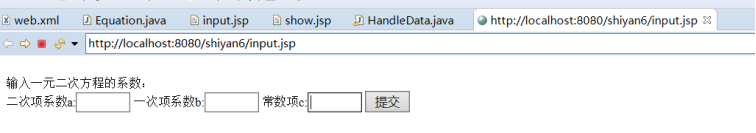

验证a=0时：

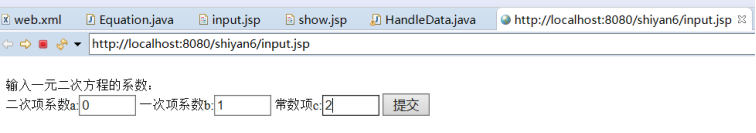

提交后：

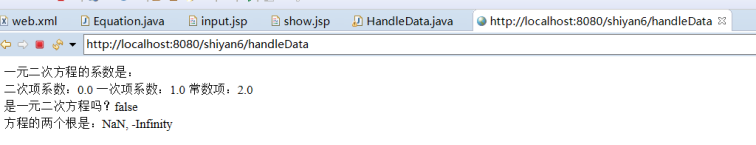

验证有实根：

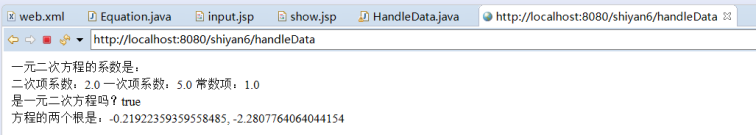

验证无实根：

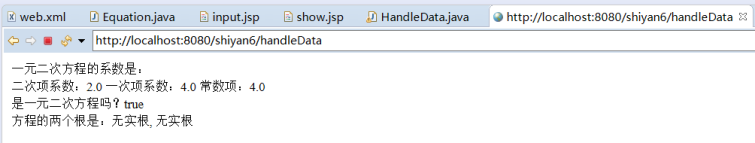

实验7-2：

运行inputData.jsp

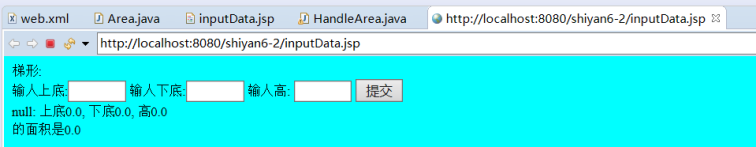

输入数据：

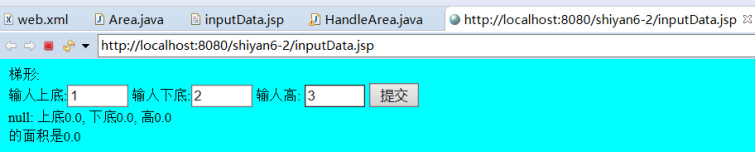

提交后：

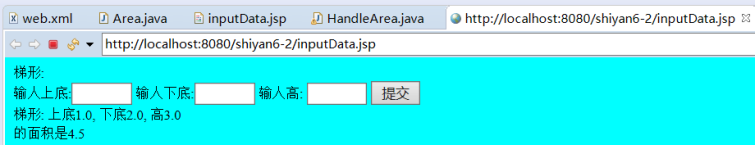

实验7-3：

在留言时，用户需要输入留言的标题、留言者的姓名、留言者的E-mail和留言内容。留言板界面如图所示。

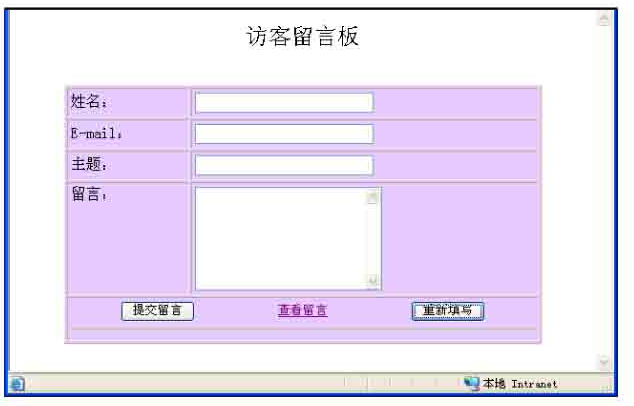

除了在数据库里保存留言者的输入信息之外，往往还需要保存留言的具体时间，所以需要创建一个保存留言的表。代码如下：
```
create database liuyan;
     use liuyan;
     create table message(title varchar(100),name varchar(20),time datetime,content
     varchar(2000),mail varchar(50));
```
这个表的名字为message，除了Date的值自动生成外，其他的值需要留言者输入。

在这个例子中使用Servlet接收HTTP请求，然后执行连接数据库的操作。操作完成后，如果需要，则操作结果保存在HTTP请求中，然后把视图派发到用于显示的JSP。

（1）留言板主页面index.jsp的代码如下：
```
<%@ page language="java" contentType="text/html; charset=GB2312"
	pageEncoding="GB2312"%>
<html>
<head>
<title>index.jsp</title>
</head>
<BODY>
<center>
<TR>
	<TD align="center" bgcolor="#CCCC99"><font size=5>访客留言板</font></TD>
</TR>
<TR>
	<FORM method="post" action="AddMessageServlet">
	<table border=1 width=500 align="center" cellpadding="3"
		cellspacing="2" bgcolor=#E6CAFF>
		<tr>
			<TD>姓名：</TD>
			<TD><INPUT type="text" name="name" size="25"></TD>
		<tr>
			<TD>E-mail：</TD>
			<TD><INPUT type="text" name="email" size="25"></TD>
		</tr>
		<tr>
			<TD>主题：</TD>
			<TD><INPUT type="text" name="title" size="25"></TD>
		</tr>
		<br>
		<tr>
			<TD valign="top">留言：</TD>
			<TD><TEXTAREA name="content" rows="7" cols="25"></TEXTAREA></TD>
		</tr>
		<TD colspan="3">
		<table align="center" width="100%" cellspacing="0" cellpadding="0"
			bordercolordark="#ffccff">
			<tr>
				<TD align="center"><INPUT type="submit" value="提交留言"></TD>
				<TD align="center"><A href="ViewMessageServlet"><FONT
					size="2">查看留言</FONT></A></TD>
				<TD align="center"><INPUT type="reset" value="重新填写"></TD>
			</tr>
		</table>
		<hr>
	</table>
	</form>
</TR>
</center>
</BODY>
</html>

```
2. 表示留言板的JavaBean文件MessageVO.java的代码如下：

```
package message;

/**
 * 此JAVABEAN代表留言板的数据
 */
public class MessageVO implements java.io.Serializable {
	private String name, email, title, content;

	private java.sql.Date date;

	// setter or getter
	public void setName(String name) {
		this.name = name;
	}

	public void setEmail(String email) {
		this.email = email;
	}

	public void setTitle(String title) {
		this.title = title;
	}

	public void setContent(String content) {
		this.content = content;
	}

	public String getName() {
		return this.name;
	}

	public String getContent() {
		return this.content;
	}

	public String getTitle() {
		return this.title;
	}

	public String getEmail() {
		return this.email;
	}

	public java.sql.Date getDate() {
		return this.date;
	}

	public void setDate(java.sql.Date date) {
		this.date = date;
	}

}

```
3. 用来保存留言的AddMessageServlet.java的代码如下：
```
package message;

import java.io.IOException;
import javax.servlet.ServletException;
import javax.servlet.http.HttpServletRequest;
import javax.servlet.http.HttpServletResponse;

/**
 * Servlet implementation class for Servlet: AddMessageServlet
 *
 */

import javax.servlet.*;
import javax.servlet.http.*;
import java.io.*;
import java.sql.Connection;
import java.sql.DriverManager;
import java.sql.PreparedStatement;
import java.sql.SQLException;
import java.sql.Statement;

public class AddMessageServlet extends HttpServlet {
    private Connection con;
    public void doGet(HttpServletRequest request ,HttpServletResponse response)
         throws IOException,ServletException{
    	response.setContentType("text/html;charset=gb2312");
    	request.setCharacterEncoding("gb2312");
        String name    = request.getParameter("name");
        String title   = request.getParameter("title");
        String email=request.getParameter("email");
        String content = request.getParameter("content");
        if(name==null)
            name = "";
        if(title==null)
            title = "";
        if(content==null)
            content = "";
        if(email==null)
        	email="";
        try
        {
            PreparedStatement stm=con.prepareStatement("insert into message values(?,?,?,?,?)");
            stm.setString(1,title);
            stm.setString(2,name);
            stm.setDate(3,new java.sql.Date(new java.util.Date().getTime()));
            if((email).length()==0)
                stm.setString(5,null);
            else stm.setString(5,email);
                    stm.setString(4,content);
            try
            {
                stm.executeUpdate();
            }catch(Exception e){}
            //关闭数据库库连接
                //con.close();
            RequestDispatcher dispatcher =
    			request.getRequestDispatcher("/ViewMessageServlet");
            dispatcher.forward(request, response);
        }
        catch(Exception e)
        {
            e.printStackTrace();
        }
        
    }
public void doPost(HttpServletRequest request,HttpServletResponse response)
throws IOException ,ServletException{
     doGet(request,response);
}
     public AddMessageServlet()
     {
    	 String url = "jdbc:mysql://localhost/liuyan";
		String userName = "root";
		String password = "root";
		String sql = null;
		con = null;
		Statement stmt = null;
		try {
			Class.forName("com.mysql.jdbc.Driver");
		} catch(ClassNotFoundException e) {
			System.out.println("加载驱动器类时出现异常");
		}
		try {
			con = DriverManager.getConnection(url, userName, password);
		} catch(SQLException e) {
			System.out.println("出现SQLException异常");
		}	
     }
} 

```
4. 用于获得留言板信息的ViewMessageServlet.java的代码如下：
```
package message;

import java.io.IOException;
import java.sql.Connection;
import java.sql.DriverManager;
import java.sql.ResultSet;
import java.sql.SQLException;
import java.sql.Statement;
import java.util.ArrayList;
import java.util.Collection;

import javax.servlet.RequestDispatcher;
import javax.servlet.ServletException;
import javax.servlet.http.HttpServletRequest;
import javax.servlet.http.HttpServletResponse;

/**
 * Servlet implementation class for Servlet: ViewMessageServlet
 * 
 */
public class ViewMessageServlet extends javax.servlet.http.HttpServlet
		implements javax.servlet.Servlet {
	/*
	 * (non-Java-doc)
	 * 
	 * @see javax.servlet.http.HttpServlet#HttpServlet()
	 */
	private Connection con;

	public ViewMessageServlet() {
		String url = "jdbc:mysql://localhost/liuyan";
		String userName = "root";
		String password = "root";
		String sql = null;
		con = null;
		Statement stmt = null;
		try {
			Class.forName("com.mysql.jdbc.Driver");
		} catch (ClassNotFoundException e) {
			System.out.println("加载驱动器类时出现异常");
		}
		try {
			con = DriverManager.getConnection(url, userName, password);
		} catch (SQLException e) {
			System.out.println("出现SQLException异常");
		}
	}

	/*
	 * (non-Java-doc)
	 * 
	 * @see javax.servlet.http.HttpServlet#doGet(HttpServletRequest request,
	 *      HttpServletResponse response)
	 */
	protected void doGet(HttpServletRequest request,
			HttpServletResponse response) throws ServletException, IOException {
		// TODO Auto-generated method stub
		Collection ret = new ArrayList();
		try {
			Statement stm = con.createStatement();
			ResultSet result = stm.executeQuery("select count(*) from message");
			int message_count = 0;
			if (result.next()) {
				message_count = result.getInt(1);
				result.close();
			}
			if (message_count > 0) {
				result = stm
						.executeQuery("select * from message order by time desc");

				while (result.next()) {
					String title = result.getString("title");
					String name = result.getString("name");
					String mail = result.getString("mail");
					String content = result.getString("content");
					java.sql.Date date = result.getDate("time");
					MessageVO message = new MessageVO();
					message.setName(name);
					message.setTitle(title);
					message.setContent(content);
					message.setDate(date);
					message.setEmail(mail);
					ret.add(message);

				}
				result.close();
				stm.close();
				request.setAttribute("messages", ret);// 和第一种方式的不同之处
				RequestDispatcher dispatcher = request
						.getRequestDispatcher("viewMessages.jsp");
				dispatcher.forward(request, response);
			}
			// con.close();
		} catch (Exception e) {
			e.printStackTrace();

		}
	}

	/*
	 * (non-Java-doc)
	 * 
	 * @see javax.servlet.http.HttpServlet#doPost(HttpServletRequest request,
	 *      HttpServletResponse response)
	 */
	protected void doPost(HttpServletRequest request,
			HttpServletResponse response) throws ServletException, IOException {
		// TODO Auto-generated method stub
		doGet(request, response);
	}
}
```
5. 显示留言的JSP页面viewMessages.jsp的代码如下：
```
<%@ page import="java.sql.*,message.*,java.util.*,java.sql.*"
	language="java" pageEncoding="UTF-8"%>
<HTML>
<HEAD>
<TITLE>show the message in the table</TITLE>
</HEAD>
<BODY>
<p align="center"><font size=5>所有访客留言</font></p>
<hr>
<%
	int message_count = 0;
	Collection messages = (Collection) request.getAttribute("messages");//和第一种方式的不同之处
	Iterator it = messages.iterator();
	while (it.hasNext()) {
		MessageVO message = (MessageVO) it.next();
%>
<table border=1 width=500 align="center" cellpadding="3" cellspacing="2"
	bgcolor=#ffccff>
	<tr>
		<td td colspan="2" align="center">
		<%
				message_count++;
				out.println("第" + message_count + "个留言者");
		%>
		</td>
	</tr>
	<tr>
		<td width="150" bgcolor="#CCCC99"><font size=3>主题：</font></td>
		<td><%=message.getTitle()%></td>
	</tr>
	<tr>
		<td bgcolor="#CCCC99"><font size=3>留言人：</font></td>
		<td><%=message.getName()%></td>
	</tr>
	<tr>
		<td bgcolor="#CCCC99"><font size=3>E-mail：</font></td>
		<td>
		<%
				out.println("<a href=mailto:" + message.getEmail() + ">"
				+ message.getEmail() + "</a>");
		%>
		</td>
	</tr>
	<tr>
		<td bgcolor="#CCCC99"><font size=3>留言时间：</font></td>
		<td>
		<%
				out.println("<font size=3>"
				+ message.getDate().toLocaleString() + "</font>");
		%>
		</td>
	</tr>
	<tr>
		<td bgcolor="#CCCC99"><font size=3>留言内容：</font></td>
		<td><%=message.getContent()%></td>
	</tr>
</table>
<%
	out.println("<hr>");
	}
%>
<p align="center"><a href="index.jsp">我要留言</a></p>
</body>
</html>

```
6. Servlet的配置信息如下：
```
<!-- message definition-->
	<servlet>
		<description></description>
		<display-name>AddMessageServlet</display-name>
		<servlet-name>AddMessageServlet</servlet-name>
		<servlet-class>message.AddMessageServlet</servlet-class>
	</servlet>
	<servlet>
		<description></description>
		<display-name>ViewMessageServlet</display-name>
		<servlet-name>ViewMessageServlet</servlet-name>
		<servlet-class>message.ViewMessageServlet</servlet-class>
	</servlet>
```
在留言板页面输入信息，地址栏中显示URL地址为
```
     http://localhost:8081/WebApp/index.jsp
```     
单击“提交留言”按钮，发布留言，并且地址栏中显示URL地址为
```
http://localhost:8081/WebApp/AddMessageServlet
```

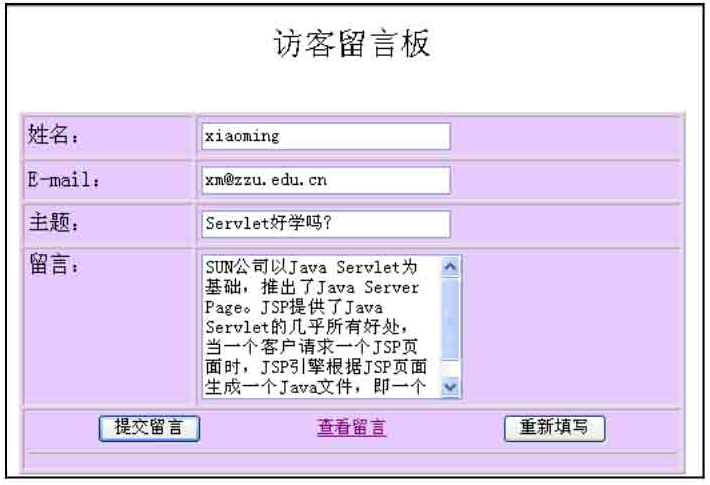

提交留言后转向保存留言的Servlet-AddMessageServlet，由于AddMessageServlet.java中的代码：
```
RequestDispatcher dispatcher =request.getRequestDispatcher("/ViewMessageServlet");
     dispatcher.forward(request, response);
```
所以添加完留言就转向了Servlet- ViewMessageServlet，而ViewMessageServlet.java中的代码：
```
          request.setAttribute("messages", ret);
          RequestDispatcher dispatcher = equest.getRequestDispatcher
     ("viewMessages.jsp");
          dispatcher.forward(request, response);
```
又把页面转向了显示留言的页面viewMessages.jsp，所以添加完留言和查看留言都是viewMessages.jsp页面显示的内容。再添加一条留言，然后通过超级链接查看所有留言，如图所示。

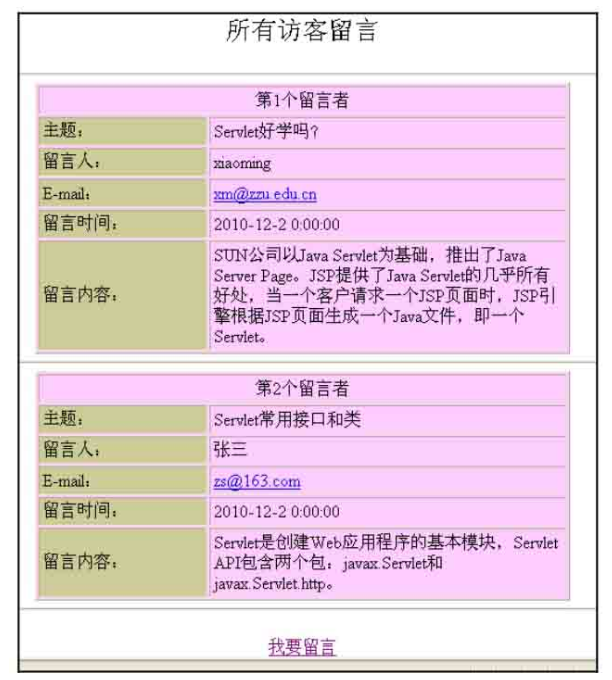

注意，直接执行viewMessages.jsp是不能显示留言的，因为只有在ViewMessageServlet.java文件中采用代码：
```
     request.setAttribute("messages", ret);
```
在viewMessages.jsp中才能使用：

```
     Collection messages = (Collection) request.getAttribute("messages");
```
在此留言板中，客户端请求首先发送到Servlet，Servlet通过JDBC连接数据库，执行数据库操作。操作完成后用JavaBean封装执行的结果，然后把结果保存到请求对象中，最后把视图派发到用于显示的JSP页面。JSP页面读取Servlet的执行结果进行显示。

在这种MVC的开发模式中，JSP用于显示，它充当了视图的角色；Servlet用于执行业务逻辑，它相当于控制器的角色；JavaBean用于表示数据，相当于模型的角色。这种模式层次关系清楚，开发页面也易于维护，建议在项目中优先考虑。

五、讨论

1. MVC模式的核心思想是有效地组合“视图”、“模型”和“控制器”。
2. 在JSP技术中,视图是一个或多个JSP页面,其作用主要是向控制器提交必要的数据和为模型提供数据显示。
3. 模型是一个或多个Javabean对象,用于存储数据。
4. 控制器是一个或多个servlet对象，根据视图提交的要求进行数据处理操作，并将有关的结果存储到Javabean中,然后servlet使用重定向方式请求视图中的某个JSP页面更新显示。
5. 在MVC模式中,模型也可以由控制器负责创建和初始化。

# 思考题